# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## 1.1 Reading Data

In [0]:
Project_Data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_data.csv")
resource_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Resources.csv")

In [5]:
print("Number of data points in train data", Project_Data.shape)
print('-'*50)
print("The attributes of data :", Project_Data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
project_data=Project_Data.sample(n=50000)
project_data.shape

(50000, 17)

In [7]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
23374,72317,p087808,598621c141cda5fb184ee7e8ccdd3fcc,Ms.,CA,2016-04-27 02:04:15,Grades PreK-2,Literacy & Language,"ESL, Literacy",iPad for Learners,Never has society so rapidly changed. Technolo...,Our Language Arts and Social Justice Magnet Sc...,"\""Is it my turn, Ms. K? When am I going to be ...","By donating to this project, you will give my ...",My students need 1 ipad mini.,127,1
86551,114684,p049177,679f50f18ce50aabcc602d17f7627206,Mrs.,HI,2016-04-27 02:18:58,Grades 3-5,Math & Science,"Applied Sciences, Mathematics",Dash and Dot Robotic Duo Needed,Do you remember the first time you saw Star Wa...,I am a teacher/librarian at an elementary scho...,My students need a Dash and Dot robot duo to e...,These robots incorporate the STEM subject area...,My students need a Dash & Dot Pack and Wonder ...,41,1
7176,79341,p091436,bb2599c4a114d211b3381abe9f899bf8,Mrs.,OH,2016-04-27 07:24:47,Grades PreK-2,"Math & Science, Applied Learning","Applied Sciences, Early Development",Robots are Taking over 2nd Grade,"Computer coding and robotics, my second grader...","We are a small, rural school in Northwest Ohio...",We have a new technology teacher to our distri...,You can help this dream of ours become a reali...,My students need a robot mouse STEM activity s...,72,1
70898,128817,p239087,11a60ddd63717c59fdd5a13ea92d34aa,Mrs.,KY,2016-04-27 08:02:22,Grades 3-5,"Math & Science, Literacy & Language","Environmental Science, Literacy",Time for Kids....To Learn About Science and more!,"I teach 4th grade math, writing, social studie...",My 4th grade students are excited learners and...,Very few students have materials at home to he...,This project will change the lives of my stude...,My students need a real-world cross-curricular...,1,1


In [8]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [12]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...
23374,72317,p087808,598621c141cda5fb184ee7e8ccdd3fcc,Ms.,CA,2016-04-27 02:04:15,Grades PreK-2,iPad for Learners,Never has society so rapidly changed. Technolo...,Our Language Arts and Social Justice Magnet Sc...,"\""Is it my turn, Ms. K? When am I going to be ...","By donating to this project, you will give my ...",My students need 1 ipad mini.,127,1,Literacy_Language,ESL Literacy,Never has society so rapidly changed. Technolo...


In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [14]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[19000])
print("="*50)

Having a class of 24 students comes with diverse learners.  Some students learn best through auditory means.I have a class of twenty-four kindergarten students.\r\nMy students attend a Title 1 school and a great majority are English language learners. Most of our students come from low-income homes, and all students receive free breakfast and lunch. My students are enthusiastic learners, but too often are faced with many types of hardships at home. School is often a safe haven for them.By having a mobile listening and storage center, my students will be able to reinforce and enhance what they are learning.  They will be able to listen to stories using the mobile listening center to help reinforce the high frequency words that have been introduced.  In addition, they will be able to listen to stories that reinforce reading comprehension skills and strategies amongst other auditory experiences.A mobile listening center will help keep equipment neat and organized....ready to use to help r

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(project_data['essay'].values[19000])
print(sent)
print("="*50)

The students at Shands Elementary are one of a kind. They are genuinely unique. Half of the classrooms are bilingual learners that strive everyday to learn english proficiency through English and Spanish lessons for math, spelling and reading. The english speaking classrooms open up their space to help and encourage the students for success, while eagerly learning spanish as they can from the bilingual students. \r\n\r\nThis school has 26 1:1 ipad carts which equips a low socioeconomic group of students to become familiar with 21st century learning and collaboration to develop work skills for the future.Breakout EDU creates ultra-engaging learning games for people of all ages. Games (Breakouts) teach teamwork, problem solving, critical thinking, and troubleshooting by presenting participants with challenges that ignite their natural drive to problem-solve. Breakouts are perfect for classrooms and staff trainings! At the end of a Breakout, the students and teachers will be eager for the

In [17]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

The students at Shands Elementary are one of a kind. They are genuinely unique. Half of the classrooms are bilingual learners that strive everyday to learn english proficiency through English and Spanish lessons for math, spelling and reading. The english speaking classrooms open up their space to help and encourage the students for success, while eagerly learning spanish as they can from the bilingual students.     This school has 26 1:1 ipad carts which equips a low socioeconomic group of students to become familiar with 21st century learning and collaboration to develop work skills for the future.Breakout EDU creates ultra-engaging learning games for people of all ages. Games (Breakouts) teach teamwork, problem solving, critical thinking, and troubleshooting by presenting participants with challenges that ignite their natural drive to problem-solve. Breakouts are perfect for classrooms and staff trainings! At the end of a Breakout, the students and teachers will be eager for the nex

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

The students at Shands Elementary are one of a kind They are genuinely unique Half of the classrooms are bilingual learners that strive everyday to learn english proficiency through English and Spanish lessons for math spelling and reading The english speaking classrooms open up their space to help and encourage the students for success while eagerly learning spanish as they can from the bilingual students This school has 26 1 1 ipad carts which equips a low socioeconomic group of students to become familiar with 21st century learning and collaboration to develop work skills for the future Breakout EDU creates ultra engaging learning games for people of all ages Games Breakouts teach teamwork problem solving critical thinking and troubleshooting by presenting participants with challenges that ignite their natural drive to problem solve Breakouts are perfect for classrooms and staff trainings At the end of a Breakout the students and teachers will be eager for the next Breakouts can be 

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|██████████| 50000/50000 [00:24<00:00, 2020.21it/s]


In [21]:
# after preprocesing
preprocessed_essays[19999]

'classroom filled 22 unique second graders multi cultural 6 different home languages varying economic levels wide continuum social academic needs diversity come together find strength excited facilitate encourage learning along great team second grade teachers wonderful school staff believe students school translates everyone working together see students succeed math brings challenges understanding relationship operations equations comparisons written math expressions sides equal sign comparison symbol students used seeing one side answer rather another expression problems 8 3 5 20 2 x 3 really challenge thinking number balance scales great hands tool help visually see equation works students able use balances not specific lessons also times explore deepen understanding year students going using variety actual children literature learn reading skills comprehension skills well positive force world live using books practice reading comprehension skills taught connects students learning 

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

In [23]:
#some random project titles.
print(project_data["project_title"].values[5])
print('='*50)
print(project_data['project_title'].values[1000])
print('='*50)
print(project_data["project_title"].values[5000])
print('='*50)
print(project_data["project_title"].values[19000])
print('='*50)

Getting Plugged into Learning
Center Time!! We can't wait to use technology!!
FaceAbook - share & connect in book chats
BreakoutEDU: Changing the Way We Learn!


In [24]:
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())

100%|██████████| 50000/50000 [00:01<00:00, 49612.00it/s]


In [25]:
print(preprocessed_titles[1000])
print('='*50)
print(preprocessed_titles[19000])

center time not wait use technology
breakoutedu changing way learn


## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

In [28]:
print(project_data["school_state"].values)

['CA' 'CA' 'HI' ... 'CA' 'HI' 'CA']


In [29]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])    

100%|██████████| 50000/50000 [00:00<00:00, 121777.84it/s]

['CA', 'CA', 'HI', 'OH', 'KY', 'SC', 'FL', 'CA', 'NY', 'CA', 'VA', 'NY', 'GA', 'OK', 'PA']


In [30]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])    

100%|██████████| 50000/50000 [00:00<00:00, 119505.99it/s]

['Mrs', 'Ms', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mr', 'Mrs', 'Ms', 'Ms', 'Mrs', 'Mr']


In [31]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])    

 23%|██▎       | 11379/50000 [00:00<00:00, 113783.06it/s]

['Grades PreK-2' 'Grades PreK-2' 'Grades 3-5' ... 'Grades 3-5'
 'Grades 9-12' 'Grades PreK-2']


100%|██████████| 50000/50000 [00:00<00:00, 114474.05it/s]

['GradesPreK2', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades35', 'GradesPreK2', 'Grades35', 'Grades35', 'Grades35', 'Grades912', 'Grades35', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'Grades68', 'Grades68', 'GradesPreK2', 'Grades68', 'GradesPreK2', 'Grades35']


### 1.5.3 Vectorizing Numerical features

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [33]:
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,329.0,1


In [0]:
dataset_0=project_data[["clean_categories","clean_subcategories",]]
dataset_0["school_state"]=preprocessed_school_state
dataset_0["teacher_prefix"]=preprocessed_teacher_prefix
dataset_0["project_grade"]=preprocessed_project_grade
dataset_0["price"]=project_data["price"]
dataset_0["teacher_number_of_previously_posted_projects"]=project_data["teacher_number_of_previously_posted_projects"]
dataset_0["titles"]=preprocessed_titles
dataset_0["essays"]=preprocessed_essays

In [35]:
dataset_0.head()

,clean_categories,clean_subcategories,school_state,teacher_prefix,project_grade,price,teacher_number_of_previously_posted_projects,titles,essays
0,Literacy_Language,Literacy,CA,Mrs,GradesPreK2,329.00,10,mobile learning mobile listening center,class 24 students comes diverse learners stude...
1,Literacy_Language,ESL Literacy,CA,Ms,GradesPreK2,299.99,127,ipad learners,never society rapidly changed technology invad...
2,Math_Science,AppliedSciences Mathematics,HI,Mrs,Grades35,479.94,41,dash dot robotic duo needed,remember first time saw star wars wall e robot...
3,Math_Science AppliedLearning,AppliedSciences EarlyDevelopment,OH,Mrs,GradesPreK2,50.96,72,robots taking 2nd grade,computer coding robotics second graders excite...
4,Math_Science Literacy_Language,EnvironmentalScience Literacy,KY,Mrs,Grades35,6.81,1,time kids learn science,teach 4th grade math writing social studies sc...


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dataset_0,project_data["project_is_approved"].values,test_size=0.3,random_state=2,stratify=project_data["project_is_approved"].values)

In [38]:
x_train.columns

Index(['clean_categories', 'clean_subcategories', 'school_state',
       'teacher_prefix', 'project_grade', 'price',
       'teacher_number_of_previously_posted_projects', 'titles', 'essays'],
      dtype='object')

# 2.2 Make Data Model Ready: encoding numerical, categorical features


In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
count_vect_1=CountVectorizer(lowercase=False,binary=True)
train_categories_one_hot=count_vect_1.fit_transform(x_train["clean_categories"].values)
test_categories_one_hot=count_vect_1.transform(x_test["clean_categories"].values)
count_vect_2=CountVectorizer(lowercase=False,binary=True)
train_subcategories_one_hot=count_vect_2.fit_transform(x_train["clean_subcategories"].values)
test_subcategories_one_hot=count_vect_2.transform(x_test["clean_subcategories"].values)
count_vect_3=CountVectorizer(lowercase=False,binary=True)
train_school_state_one_hot=count_vect_3.fit_transform(x_train["school_state"].values)
test_school_state_one_hot=count_vect_3.transform(x_test["school_state"].values)
count_vect_4=CountVectorizer(lowercase=False,binary=True)
train_teacher_prefix=count_vect_4.fit_transform(x_train["teacher_prefix"].values)
test_teacher_prefix=count_vect_4.transform(x_test["teacher_prefix"].values)
count_vect_5=CountVectorizer(lowercase=False,binary=True)
train_project_grade=count_vect_5.fit_transform(x_train["project_grade"].values)
test_project_grade=count_vect_5.transform(x_test["project_grade"].values)

from sklearn.preprocessing import StandardScaler

scaler_1=StandardScaler()
train_price=scaler_1.fit_transform(x_train["price"].values.reshape(-1,1))
test_price=scaler_1.transform(x_test["price"].values.reshape(-1,1))
scaler_2=StandardScaler()
train_teacher_num=scaler_2.fit_transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
test_teacher_num=scaler_2.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

# 2.3 Make Data Model Ready: encoding eassay, and project_title

In [0]:
count_vect_titles=CountVectorizer()
train_title_bow=count_vect_titles.fit_transform(x_train["titles"].values)
test_title_bow=count_vect_titles.transform(x_test["titles"].values)
count_vect_essays=CountVectorizer()
train_essay_bow=count_vect_essays.fit_transform(x_train["essays"].values)
test_essay_bow=count_vect_essays.transform(x_test["essays"].values)

In [0]:
tfidf_vect_titles=TfidfVectorizer()
train_title_tfidf=tfidf_vect_titles.fit_transform(x_train["titles"].values)
test_title_tfidf=tfidf_vect_titles.transform(x_test["titles"].values)
tfidf_vect_essays=TfidfVectorizer()
train_essay_tfidf=tfidf_vect_essays.fit_transform(x_train["essays"].values)
test_essay_tfidf=tfidf_vect_essays.transform(x_test["essays"].values)

In [42]:
train_title_list=[]
for i in x_train["titles"].values:
    train_title_list.append(i.split())
w2v_model_titles=Word2Vec(train_title_list,min_count=5,size=50)
title_w2v_words=w2v_model_titles.wv.vocab

train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["titles"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|██████████| 35000/35000 [00:00<00:00, 67568.14it/s]

35000
50


In [43]:
test_avg_w2v_vectors_titles = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["titles"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|██████████| 15000/15000 [00:00<00:00, 61544.04it/s]

15000
50


In [44]:
train_essay_list=[]
for i in x_train["essays"].values:
    train_essay_list.append(i.split())
    
w2v_model_essays=Word2Vec(train_essay_list,min_count=10,size=50)

essay_w2v_words=w2v_model_essays.wv.vocab
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|██████████| 35000/35000 [00:14<00:00, 2414.29it/s]

35000
50


In [45]:
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|██████████| 15000/15000 [00:06<00:00, 2404.02it/s]

15000
50


In [46]:
tfidf_model_titles = TfidfVectorizer()
tfidf_matrix_train_title=tfidf_model_titles.fit_transform(x_train["titles"].values)
tfidf_matrix_test_title=tfidf_model_titles.transform(x_test["titles"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_t = dict(zip(tfidf_model_titles.get_feature_names(), list(tfidf_model_titles.idf_)))
tfidf_words_titles = set(tfidf_model_titles.get_feature_names())

train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["titles"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_titles.append(vector)

print(len(train_tfidf_w2v_vectors_titles))
print(len(train_tfidf_w2v_vectors_titles[0]))

100%|██████████| 35000/35000 [00:00<00:00, 38157.51it/s]

35000
50


In [47]:
test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["titles"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_titles.append(vector)

print(len(test_tfidf_w2v_vectors_titles))
print(len(test_tfidf_w2v_vectors_titles[0]))

100%|██████████| 15000/15000 [00:00<00:00, 37481.85it/s]

15000
50


In [48]:
tfidf_model_essay = TfidfVectorizer()
tfidf_matrix_essay_train=tfidf_model_essay.fit_transform(x_train["essays"].values)
tfidf_matrix_essay_test=tfidf_model_essay.transform(x_test["essays"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_e = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay= set(tfidf_model_essay.get_feature_names())

train_tfidf_w2v_vectors_essays = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_essays.append(vector)

print(len(train_tfidf_w2v_vectors_essays))
print(len(train_tfidf_w2v_vectors_essays[0]))

100%|██████████| 35000/35000 [01:09<00:00, 500.86it/s]

35000
50


In [49]:
test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essays"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_essays.append(vector)

print(len(test_tfidf_w2v_vectors_essays))
print(len(test_tfidf_w2v_vectors_essays[0]))

100%|██████████| 15000/15000 [00:28<00:00, 518.30it/s]

15000
50


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation
from scipy.sparse import hstack
train_set_1=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_title_bow,train_essay_bow))
test_set_1=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_title_bow,test_essay_bow))

In [0]:
k_values=[1,5,9,15,21,25,31,37,45]
k_range={"n_neighbors":k_values}

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
model_1=GridSearchCV(KNeighborsClassifier(),k_range,cv=5,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)
print(model_1.best_estimator_)
print("="*50)
print(model_1.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')
{'n_neighbors': 45}


In [0]:
print(model_1.best_score_)

0.6312569554987022


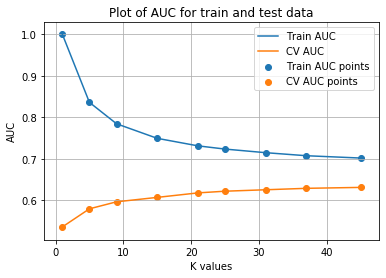

In [0]:
train_auc_score=model_1.cv_results_["mean_train_score"]
test_auc_score=model_1.cv_results_["mean_test_score"]
plt.plot(k_values,train_auc_score,label="Train AUC")
plt.scatter(k_values,train_auc_score,label="Train AUC points")
plt.plot(k_values,test_auc_score,label="CV AUC")
plt.scatter(k_values,test_auc_score,label="CV AUC points")
plt.title("Plot of AUC for train and test data")
plt.xlabel("K values")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

In [0]:
print("Train AUC score : ",model_1.score(train_set_1,y_train))
print("="*50)
print("Test AUC score : ",model_1.score(test_set_1,y_test))

Train AUC score :  0.7037249075179031
Test AUC score :  0.63584737822398


In [0]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
final_model_1=model_1.best_estimator_
pred_train_1=final_model_1.predict(train_set_1)
prob_train_1=final_model_1.predict_proba(train_set_1)
pred_test_1=final_model_1.predict(test_set_1)
prob_test_1=final_model_1.predict_proba(test_set_1)

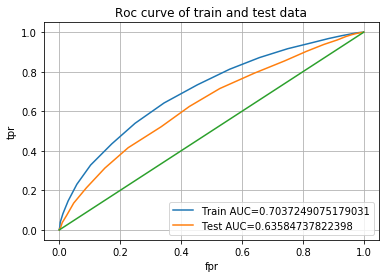

In [0]:
train_fpr,train_tpr,tr_thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr,test_tpr,te_thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr,train_tpr,label="Train AUC="+str(auc(train_fpr,train_tpr)))
plt.plot(test_fpr,test_tpr,label="Test AUC="+str(auc(test_fpr,test_tpr)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("Roc curve of train and test data")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.42115757985266994 for threshold 0.8


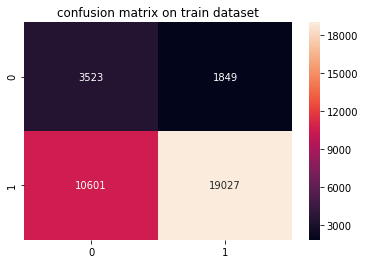

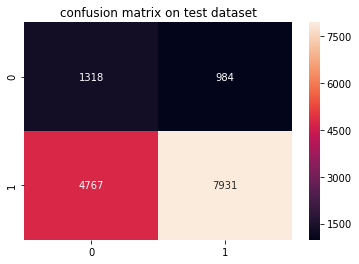

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
sns.heatmap(confusion_matrix(y_train,predict_with_best_t(prob_train_1[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on train dataset")
plt.show()

sns.heatmap(confusion_matrix(y_test,predict_with_best_t(prob_test_1[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on test dataset")
plt.show()

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [0]:
# Please write all the code with proper documentation
train_set_2=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_title_tfidf,train_essay_tfidf))
test_set_2=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_title_tfidf,test_essay_tfidf))

In [0]:
model_2=GridSearchCV(KNeighborsClassifier(),k_range,cv=5,scoring="roc_auc",return_train_score=True)
model_2.fit(train_set_2,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 9, 15, 21, 25, 31, 37, 45]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [0]:
print(model_2.best_estimator_)
print("="*50)
print(model_2.best_params_)
print("="*50)
print(model_2.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')
{'n_neighbors': 45}
0.5860716230376541


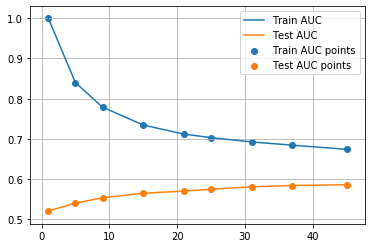

In [0]:
train_score=model_2.cv_results_["mean_train_score"]
test_score=model_2.cv_results_["mean_test_score"]
plt.plot(k_values,train_score,label="Train AUC")
plt.scatter(k_values,train_score,label="Train AUC points")
plt.plot(k_values,test_score,label="Test AUC")
plt.scatter(k_values,test_score,label="Test AUC points")
plt.legend()
plt.grid()
plt.show()

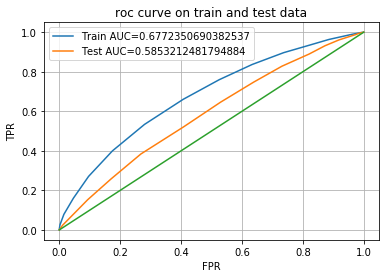

In [0]:
final_model_2=model_2.best_estimator_
prob_train_2=final_model_2.predict_proba(train_set_2)
prob_test_2=final_model_2.predict_proba(test_set_2)
fpr_train_2,tpr_train_2,tr_thresholds_2=roc_curve(y_train,prob_train_2[:,1])
fpr_test_2,tpr_test_2,te_thresholds_2=roc_curve(y_test,prob_test_2[:,1])
plt.plot(fpr_train_2,tpr_train_2,label="Train AUC="+str(auc(fpr_train_2,tpr_train_2)))
plt.plot(fpr_test_2,tpr_test_2,label="Test AUC="+str(auc(fpr_test_2,tpr_test_2)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("roc curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [0]:
print("Train AUC score : ",roc_auc_score(y_train,prob_train_2[:,1]))
print("="*50)
print("Test AUC score : ",roc_auc_score(y_test,prob_test_2[:,1]))

Train AUC score :  0.6772350690382537
Test AUC score :  0.5853212481794884


the maximum value of tpr*(1-fpr) 0.3917174037740356 for threshold 0.844


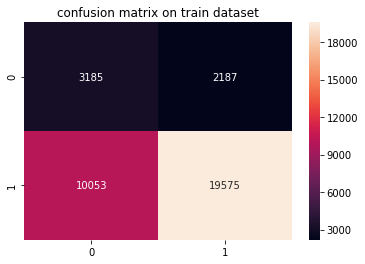

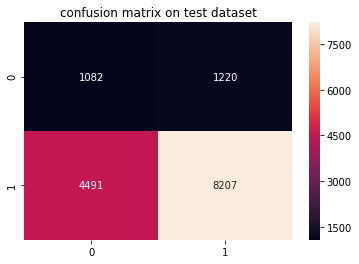

In [0]:
best_t = find_best_threshold(tr_thresholds_2, fpr_train_2, tpr_train_2)
sns.heatmap(confusion_matrix(y_train,predict_with_best_t(prob_train_2[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on train dataset")
plt.show()

sns.heatmap(confusion_matrix(y_test,predict_with_best_t(prob_test_2[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on test dataset")
plt.show()

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# Please write all the code with proper documentation
train_set_3=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_avg_w2v_vectors_titles,train_avg_w2v_vectors_essays))
test_set_3=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_avg_w2v_vectors_titles,test_avg_w2v_vectors_essays))

In [0]:
model_3=GridSearchCV(KNeighborsClassifier(),k_range,cv=5,scoring="roc_auc",return_train_score=True)
model_3.fit(train_set_3,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 9, 15, 21, 25, 31, 37, 45]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [0]:
print(model_3.best_estimator_)
print("="*50)
print(model_3.best_params_)
print('='*50)
print("Best score on cross validation data=",model_3.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')
{'n_neighbors': 45}
Best score on cross validation data= 0.6322742465022726


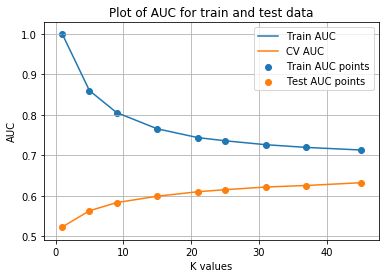

In [0]:
train_auc_score_3=model_3.cv_results_["mean_train_score"]
test_auc_score_3=model_3.cv_results_["mean_test_score"]
plt.plot(k_values,train_auc_score_3,label="Train AUC")
plt.scatter(k_values,train_auc_score_3,label="Train AUC points")
plt.plot(k_values,test_auc_score_3,label="CV AUC")
plt.scatter(k_values,test_auc_score_3,label="Test AUC points")
plt.title("Plot of AUC for train and test data")
plt.xlabel("K values")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

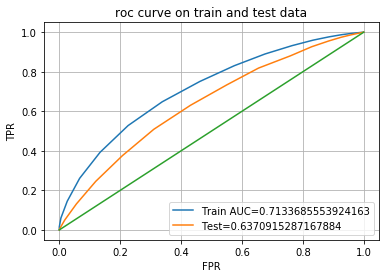

In [0]:
final_model_3=model_3.best_estimator_
prob_train_3=final_model_3.predict_proba(train_set_3)
prob_test_3=final_model_3.predict_proba(test_set_3)
fpr_train_3,tpr_train_3,tr_thresholds_3=roc_curve(y_train,prob_train_3[:,1])
fpr_test_3,tpr_test_3,te_thresholds_3=roc_curve(y_test,prob_test_3[:,1])
plt.plot(fpr_train_3,tpr_train_3,label="Train AUC="+str(auc(fpr_train_3,tpr_train_3)))

plt.plot(fpr_test_3,tpr_test_3,label="Test="+str(auc(fpr_test_3,tpr_test_3)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("roc curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

the maximum value of tpr*(1-fpr) 0.42896609763556914 for threshold 0.867


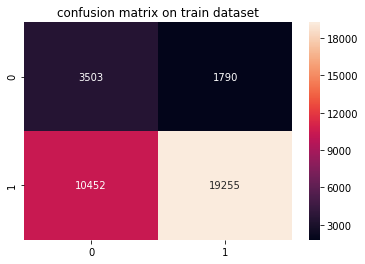

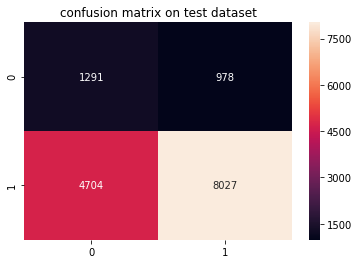

In [0]:
best_t = find_best_threshold(tr_thresholds_3, fpr_train_3, tpr_train_3)
sns.heatmap(confusion_matrix(y_train,predict_with_best_t(prob_train_3[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on train dataset")
plt.show()

sns.heatmap(confusion_matrix(y_test,predict_with_best_t(prob_test_3[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on test dataset")
plt.show()

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation
train_set_4=hstack((train_categories_one_hot,train_subcategories_one_hot,train_school_state_one_hot,train_teacher_prefix,train_project_grade,train_price,train_teacher_num,train_tfidf_w2v_vectors_titles,train_tfidf_w2v_vectors_essays))
test_set_4=hstack((test_categories_one_hot,test_subcategories_one_hot,test_school_state_one_hot,test_teacher_prefix,test_project_grade,test_price,test_teacher_num,test_tfidf_w2v_vectors_titles,test_tfidf_w2v_vectors_essays))

In [0]:
model_4=GridSearchCV(KNeighborsClassifier(),k_range,cv=5,scoring="roc_auc",return_train_score=True)
model_4.fit(train_set_4,y_train)
print(model_4.best_estimator_)
print('='*50)
print(model_4.best_params_)
print("="*50)
print("Best cross validation score=",model_4.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')
{'n_neighbors': 45}
Best cross validation score= 0.659627280024348


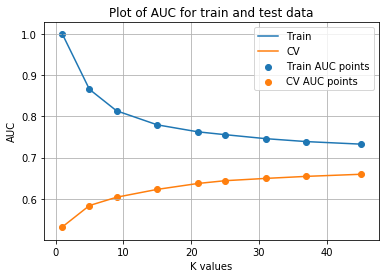

In [0]:
train_auc_score_4=model_4.cv_results_["mean_train_score"]
test_auc_score_4=model_4.cv_results_["mean_test_score"]
plt.plot(k_values,train_auc_score_4,label="Train")
plt.scatter(k_values,train_auc_score_4,label="Train AUC points")
plt.plot(k_values,test_auc_score_4,label="CV")
plt.scatter(k_values,test_auc_score_4,label="CV AUC points")
plt.title("Plot of AUC for train and test data")
plt.xlabel("K values")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

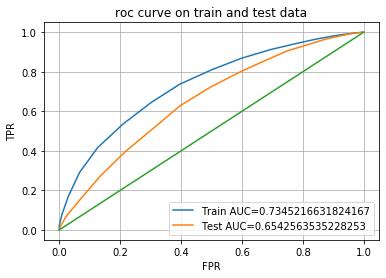

In [0]:
final_model_4=model_4.best_estimator_
prob_train_4=final_model_4.predict_proba(train_set_4)
prob_test_4=final_model_4.predict_proba(test_set_4)
fpr_train_4,tpr_train_4,tr_thresholds_4=roc_curve(y_train,prob_train_4[:,1])
fpr_test_4,tpr_test_4,te_thresholds_4=roc_curve(y_test,prob_test_4[:,1])
plt.plot(fpr_train_4,tpr_train_4,label="Train AUC="+str(auc(fpr_train_4,tpr_train_4)))
plt.plot(fpr_test_4,tpr_test_4,label="Test AUC="+str(auc(fpr_test_4,tpr_test_4)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("roc curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

the maximum value of tpr*(1-fpr) 0.4499153592438889 for threshold 0.867


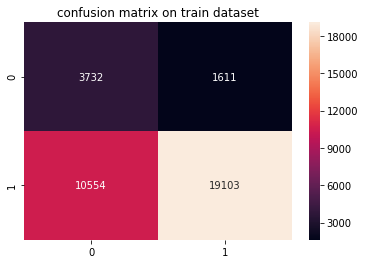

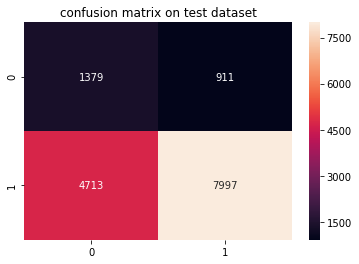

In [0]:
best_t = find_best_threshold(tr_thresholds_4, fpr_train_4, tpr_train_4)
sns.heatmap(confusion_matrix(y_train,predict_with_best_t(prob_train_4[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on train dataset")
plt.show()

sns.heatmap(confusion_matrix(y_test,predict_with_best_t(prob_test_4[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on test dataset")
plt.show()

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [56]:
print(train_set_2.shape)

(35000, 46058)


In [57]:
from sklearn.feature_selection import SelectKBest,chi2

skb=SelectKBest(chi2,k=2000)
skb.fit(abs(train_set_2),y_train)
x_new_train=skb.transform(abs(train_set_2))
x_new_test=skb.transform(abs(test_set_2))
print(x_new_train.shape)
print(x_new_test.shape)

(35000, 2000)
(15000, 2000)


In [58]:
knew_model=GridSearchCV(KNeighborsClassifier(),k_range,cv=5,scoring="roc_auc",return_train_score=True)
knew_model.fit(x_new_train,y_train)
print(knew_model.best_estimator_)
print("="*50)
print(knew_model.best_params_)
print("="*50)
print("Best cross validation score : ",knew_model.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=45, p=2,
                     weights='uniform')
{'n_neighbors': 45}
Best cross validation score :  0.5532221312171537


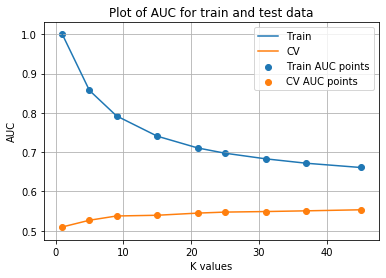

In [59]:
train_auc_score_k=knew_model.cv_results_["mean_train_score"]
test_auc_score_k=knew_model.cv_results_["mean_test_score"]
plt.plot(k_values,train_auc_score_k,label="Train")
plt.scatter(k_values,train_auc_score_k,label="Train AUC points")
plt.plot(k_values,test_auc_score_k,label="CV")
plt.scatter(k_values,test_auc_score_k,label="CV AUC points")
plt.title("Plot of AUC for train and test data")
plt.xlabel("K values")
plt.ylabel("AUC")
plt.grid()
plt.legend()
plt.show()

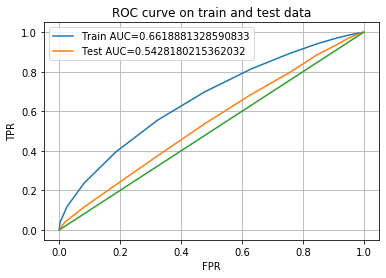

In [60]:
prob_train_k=knew_model.predict_proba(x_new_train)
prob_test_k=knew_model.predict_proba(x_new_test)
fpr_train_k,tpr_train_k,tr_thresholds_k=roc_curve(y_train,prob_train_k[:,1])
fpr_test_k,tpr_test_k,te_thresholds_k=roc_curve(y_test,prob_test_k[:,1])
plt.plot(fpr_train_k,tpr_train_k,label="Train AUC="+str(auc(fpr_train_k,tpr_train_k)))
plt.plot(fpr_test_k,tpr_test_k,label="Test AUC="+str(auc(fpr_test_k,tpr_test_k)))
plt.plot([0.0,1.0],[0.0,1.0])
plt.title("ROC curve on train and test data")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

the maximum value of tpr*(1-fpr) 0.37599174332924046 for threshold 0.889


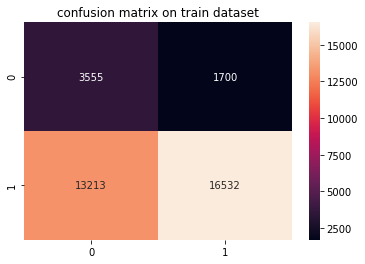

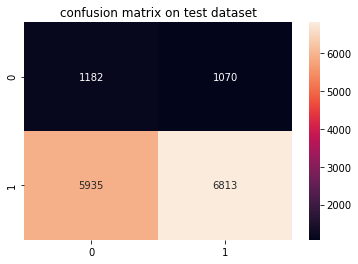

In [61]:
best_t = find_best_threshold(tr_thresholds_k, fpr_train_k, tpr_train_k)
sns.heatmap(confusion_matrix(y_train,predict_with_best_t(prob_train_k[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on train dataset")
plt.show()

sns.heatmap(confusion_matrix(y_test,predict_with_best_t(prob_test_k[:,1],best_t)),annot=True,fmt="d")
plt.title("confusion matrix on test dataset")
plt.show()

<h1>3. Conclusions</h1>

In [0]:
# Please compare all your models using Prettytable library

In [62]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=("Vectorizer"," Best K value","Train AUC score","Test AUC score")
table.add_row(("BOW",45,.70,.63))
table.add_row(("Tfidf",45,.67,.58))
table.add_row(("Avg_W2V",45,.71,.64))
table.add_row(("Tfidf_W2V",45,.73,.65))
table.add_row(("top 2000 feat.",45,.66,.54))
print(table)

+----------------+---------------+-----------------+----------------+
|   Vectorizer   |  Best K value | Train AUC score | Test AUC score |
+----------------+---------------+-----------------+----------------+
|      BOW       |       45      |       0.7       |      0.63      |
|     Tfidf      |       45      |       0.67      |      0.58      |
|    Avg_W2V     |       45      |       0.71      |      0.64      |
|   Tfidf_W2V    |       45      |       0.73      |      0.65      |
| top 2000 feat. |       45      |       0.66      |      0.54      |
+----------------+---------------+-----------------+----------------+


## Conclusions:


*  Model on the trainning dataset with Tfidf_W2V gave highest test score .65,and model on top 2000 dimentional dataset gave lowest test AUC score .54
*  Model_3 and Model_4 are fairly good models in comparision to other models because these two are less overfit models than other. 

